In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\luyil\ihealth\datasets\preproc\data_for_ml.csv")
data.shape

(6700685, 25)

In [19]:
data.head()

,Unnamed: 0.1,Unnamed: 0,insurer_paid_amt_mean,insurer_paid_amt_sum,member_paid_amt_mean,member_paid_amt_sum,total_paid_amt_mean,total_paid_amt_sum,service_year,county_code,...,insurer_paid_amt_median,member_paid_amt_median,insurer_paid_sum_prop,insurer_paid_mean_prop,member_paid_sum_prop,member_paid_mean_prop,average_ops_cnt,sex_encoded,service_encoded,payer_encoded
0,0,1,258.94,3366.29,71.67,931.73,330.61,4298.02,2010.0,9.0,...,284.33,43.26,0.783219,0.783219,0.216781,0.216781,1.846154,1,24,0
1,1,2,225.33,28392.81,0.00,0.00,225.33,28392.81,2010.0,7.0,...,81.83,0.00,1.000000,1.000000,0.000000,0.000000,1.626984,1,2,2
2,2,3,1311.12,14422.37,32.76,360.45,1343.89,14782.82,2010.0,25.0,...,1674.97,0.00,0.975617,0.975616,0.024383,0.024377,1.000000,0,19,0
3,3,4,2922.00,46752.03,1102.31,17637.01,4024.31,64389.04,2010.0,23.0,...,0.00,0.00,0.726087,0.726087,0.273913,0.273913,1.375000,1,8,1
4,4,5,270.29,4054.36,164.76,2471.52,435.05,6525.88,2010.0,9.0,...,133.34,87.72,0.621274,0.621285,0.378726,0.378715,2.400000,1,24,0


In [3]:
data = data.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1)

In [4]:
X = data.drop(["age_group_code"],axis=1)
y = data["age_group_code"]
X.shape, y.shape

((6700685, 22), (6700685,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5360548, 22), (1340137, 22), (5360548,), (1340137,))

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
pca = PCA(n_components=0.8) # 保留 95% 的方差
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 查看保留了多少个主成分
print("Remain Main Compoenents:", pca.n_components_)

Remain Main Compoenents: 8


In [8]:
X_train_pca.shape, X_test_pca.shape

((5360548, 8), (1340137, 8))

In [9]:
X_train_pca

array([[-0.49930758,  0.31663301, -0.05357066, ..., -1.11412402,
         0.07209715,  0.92131903],
       [-1.33647259,  6.33302843, -0.37245609, ...,  1.6672561 ,
         0.26644851, -1.88246343],
       [-0.39284428,  0.56818008, -0.15788617, ..., -0.03438961,
         0.97528242, -0.24654077],
       ...,
       [-0.81310784,  2.43138336, -0.13481088, ...,  1.43655792,
        -0.04005987, -1.06624863],
       [-0.23969369, -1.57705899, -0.0705564 , ...,  2.31366593,
        -0.00839796, -0.35008289],
       [-0.15728053, -1.952582  , -0.06514156, ...,  1.43660135,
        -1.96391387,  0.44058677]])

In [10]:
print(pca.explained_variance_ratio_)

total_variance = sum(pca.explained_variance_ratio_)
print("Remain squared difference ratio:", total_variance)

[0.22870162 0.20317703 0.13539185 0.07128733 0.06423291 0.04744178
 0.04589079 0.04538703]
Remain squared difference ratio: 0.8415103440194096


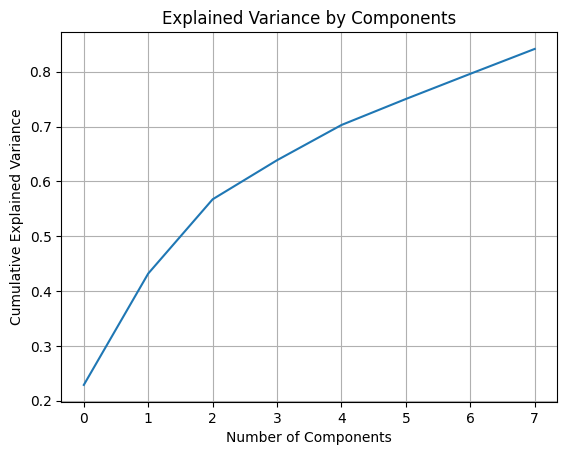

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 累积方差解释
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

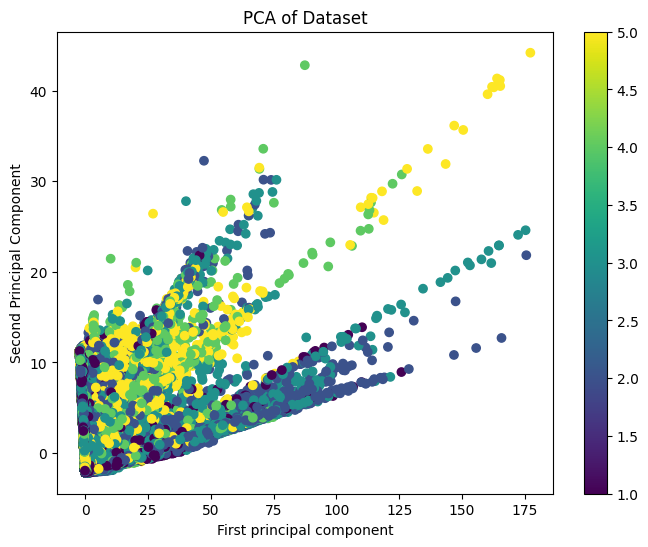

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')  # 假设 y 是标签
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

In [13]:
loadings = pca.components_
loadings

array([[ 0.40322576,  0.27321994,  0.17199915,  0.1389235 ,  0.40479106,
         0.27178516,  0.01285531, -0.00426473,  0.07267087,  0.16571513,
         0.07246948,  0.40067842,  0.39834122,  0.1573441 ,  0.07453495,
         0.07453403, -0.07453495, -0.07444962,  0.26201789,  0.00188863,
        -0.03558679,  0.04321073],
       [ 0.03078298,  0.04548369,  0.16950937,  0.08408265,  0.03860779,
         0.05065088, -0.0333823 ,  0.00453023,  0.02677788,  0.02334247,
         0.02789898,  0.04068311,  0.03267866,  0.12848533, -0.4587136 ,
        -0.45861037,  0.4587136 ,  0.45869321, -0.00169272,  0.01824841,
         0.05375289, -0.29988842],
       [-0.18326144,  0.29708169, -0.08291095,  0.36830386, -0.18420636,
         0.31478887, -0.00236741, -0.0107351 ,  0.45077073,  0.33294744,
         0.45071867, -0.18946332, -0.18800598, -0.06876896,  0.02211568,
         0.02211303, -0.02211568, -0.0221596 , -0.08237905, -0.015597  ,
        -0.01742412,  0.0056697 ],
       [-0.09331685

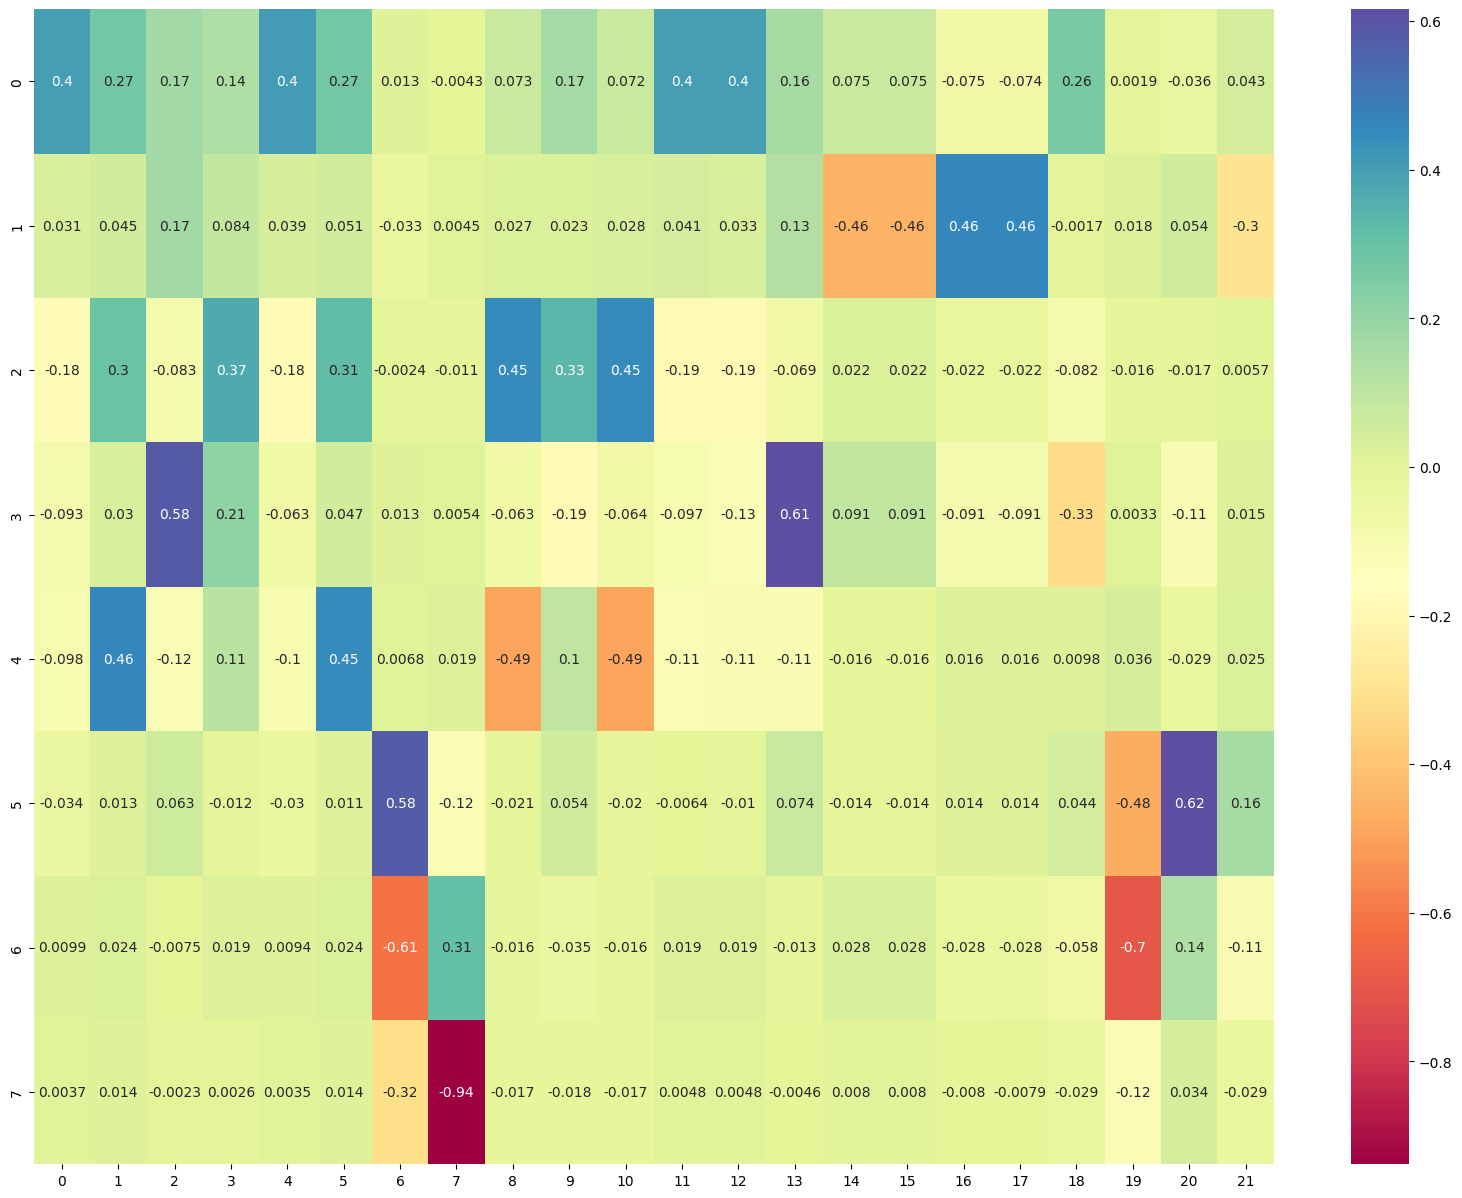

In [14]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(loadings, annot=True, cmap='Spectral')
plt.show()

In [32]:
X_train.dtypes

insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
unique_member_cnt          float64
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
sex_encoded                  int64
service_encoded              int64
payer_encoded                int64
dtype: object

In [18]:
X_train_pca.size

42884384

In [22]:
X_train_pca.shape, y_train.shape

((5360548, 8), (5360548,))

In [23]:
len(y_train)

5360548

In [45]:
sample_size = int(len(y_train) /10)
sample_size

536054

In [34]:
X_test_pca[1], y_train[1]

(array([ 1.21044882e-03, -1.87695249e+00, -1.36537795e-01, -2.29560355e-02,
         5.05947491e-02,  1.36180992e+00,  5.59515775e-01,  1.08656902e+00]),
 2.0)

In [46]:
# random sampling
sample_idx = np.random.choice(a=len(X_train_pca),size=sample_size, replace=False)
print(sample_idx, len(sample_idx))
X_train_pca_smp = X_train_pca[sample_idx]
y_train_smp = y_train.iloc[sample_idx]
X_train_pca_smp.shape, y_train_smp.shape

[2143020 2892224 2755025 ... 2073306 3930979  910952] 536054


((536054, 8), (536054,))

In [49]:
# save the pca data
np.save(r"C:\Users\luyil\ihealth\datasets\preproc\pca_data\x_train_pca.npy",X_train_pca)
np.save(r"C:\Users\luyil\ihealth\datasets\preproc\pca_data\x_test_pca.npy",X_test_pca)

y_test.to_csv(r"C:\Users\luyil\ihealth\datasets\preproc\pca_data\y_test.csv")
y_train.to_csv(r"C:\Users\luyil\ihealth\datasets\preproc\pca_data\y_train.csv")

In [55]:
X_train_pca_smp.shape, y_train_smp.shape

((536054, 8), (536054,))

In [57]:
X_train_pca_df = pd.DataFrame(X_train_pca_smp)
X_train_pca_df.to_csv(r"C:\Users\luyil\ihealth\datasets\preproc\pca_data\x_smp.csv")
y_train_smp.to_csv(r"C:\Users\luyil\ihealth\datasets\preproc\pca_data\y_smp.csv")

In [53]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=5)
agglomerative.fit(X_train_pca_smp)

MemoryError: Unable to allocate 1.05 TiB for an array with shape (143676677431,) and data type float64